In [1]:
# import stuff...
import os
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import csv
import copy

# Define parameters

In [64]:
fpath='/p/lscratchh/yi10/llsm-data/2021-09-30-mCherryRAW264.7-condition1/focused-fast-scans/results_dsk/cell2_Iter_0_deskewed'
fname='Deskewed_cell2_Iter_0_ch0_stack0000_3nm_0000000msec_0507260585msecAbs.tif'
fnamem0='MIP_channel0_XY.tif'
fnamem1='MIP_channel0_XZ.tif'
fnamem2='MIP_channel0_YZ.tif'

s=io.imread(os.path.join(fpath,fname))
m0=io.imread(os.path.join(fpath,fnamem0))[:,2:-2,2:-2]
m1=io.imread(os.path.join(fpath,fnamem1))[:,2:-2,2:-2]
m2=io.imread(os.path.join(fpath,fnamem2))[:,2:-2,2:-2]


# Look at MIP in XY, YZ, and XZ

make sure the cells are not closely interacting

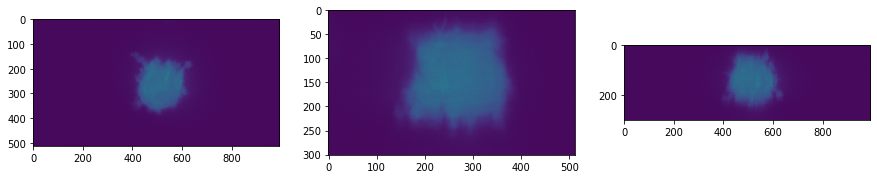

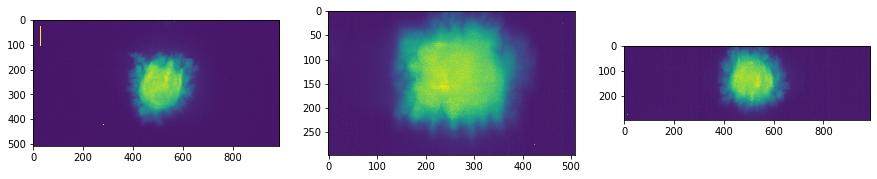

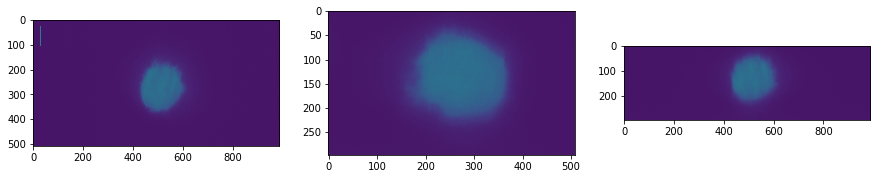

In [67]:
mip_0=np.max(s,axis=0)
mip_1=np.max(s,axis=1)
mip_2=np.max(s,axis=2)

plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(mip_0.T)
plt.subplot(132)
plt.imshow(mip_1)
plt.subplot(133)
plt.imshow(mip_2)

k0=np.max(m0,axis=0)
k1=np.max(m1,axis=0)
k2=np.max(m2,axis=0)
plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(k0.T,vmax=2000)
plt.subplot(132)
plt.imshow(k1,vmax=2000)
plt.subplot(133)
plt.imshow(k2,vmax=2000)


j0=np.min(m0,axis=0)
j1=np.min(m1,axis=0)
j2=np.min(m2,axis=0)
plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(j0.T,vmax=2000)
plt.subplot(132)
plt.imshow(j1,vmax=2000)
plt.subplot(133)
plt.imshow(j2,vmax=2000)

# Display tmax mips in bokeh

In [66]:
from bokeh.plotting import figure, show
from bokeh.io import push_notebook, output_notebook
from matplotlib import cm, colors
output_notebook()

Loading BokehJS ...

In [41]:
TOOLTIPS = [("x", "$x{int}"), ("y", "$y{int}"), ("value", "@image")]
select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'reset']
p=figure(tooltips=TOOLTIPS, tools=select_tools)
pink_cmap = cm.get_cmap('pink', 256)
pink_cmap256 = pink_cmap(np.linspace(0, 1, 256))
palette = tuple(colors.to_hex(i) for i in pink_cmap256)
p.image(image=[k0], x=0, y=0, dw=512, dh=1000, palette=palette)
show(p)

# calculate AC using pysofi

In [18]:
from bokeh.plotting import figure, show

NameError: name 'p' is not defined

# Drafts

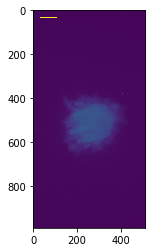

In [31]:
plt.imshow(k0)

In [51]:

%matplotlib inline
import numpy as np
from random import choice
from string import ascii_lowercase

from bokeh.models.tools import *
from bokeh.plotting import *
from bokeh.models import CustomJS



output_notebook()


TOOLS="pan,wheel_zoom,reset,hover,poly_select,box_select"
p = figure(title = "My chart", tools=TOOLS)
p.xaxis.axis_label = 'X'
p.yaxis.axis_label = 'Y'

source = ColumnDataSource(
    data=dict(
        xvals=list(range(0, 10)),
        yvals=list(np.random.normal(0, 1, 10)),
        letters = [choice(ascii_lowercase) for _ in range(10)]
    )
)
p.scatter("xvals", "yvals",source=source,fill_alpha=0.2, size=5)

select_tool = p.select(dict(type=BoxSelectTool))[0]

source.callback = CustomJS(
        args=dict(p=p), 
        code="""
        var inds = cb_obj.get('selected')['1d'].indices;
        var d1 = cb_obj.get('data');
        console.log(d1)
        var kernel = IPython.notebook.kernel;
        IPython.notebook.kernel.execute("inds = " + inds);
        """
)

show(p)


Loading BokehJS ...